In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import os 

base_dir = 'D:\\College\\Semester5\\MetoPen\\project ML\\dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    horizontal_flip=True,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    fill_mode='nearest',
                                    shear_range=0.2,
                                    zoom_range=0.2)

validation_datagen = ImageDataGenerator( rescale = 1.0/225)


train_generator = train_datagen.flow_from_directory( train_dir,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory( validation_dir,
                                                                target_size = (64, 64),
                                                                batch_size = 32,
                                                                class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
250/250 [==============================] - 41s 161ms/step - loss: 0.6937 - accuracy: 0.5051 - val_loss: 0.6894 - val_accuracy: 0.5610
Epoch 2/10
250/250 [==============================] - 40s 158ms/step - loss: 0.6850 - accuracy: 0.5612 - val_loss: 0.7869 - val_accuracy: 0.5020
Epoch 3/10
250/250 [==============================] - 38s 152ms/step - loss: 0.6608 - accuracy: 0.6046 - val_loss: 0.6599 - val_accuracy: 0.6065
Epoch 4/10
250/250 [==============================] - 41s 163ms/step - loss: 0.6491 - accuracy: 0.6257 - val_loss: 0.6405 - val_accuracy: 0.6105
Epoch 5/10
250/250 [==============================] - 38s 153ms/step - loss: 0.6255 - accuracy: 0.6507 - val_loss: 0.6003 - val_accuracy: 0.6590
Epoch 6/10
250/250 [==============================] - 39s 155ms/step - loss: 0.6159 - accuracy: 0.6640 - val_loss: 0.6259 - val_accuracy: 0.6205
Epoch 7/10
250/250 [==============================] - 38s 151ms/step - loss: 0.6044 - accuracy: 0.6718 - val_loss: 0.5478 - val_ac

Input Image is cat


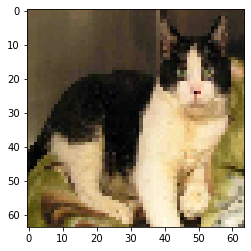

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#test_image = image.load_img('cat.1.jpg',target_size=(64,64))
test_image = image.load_img('cat.4062.jpg',target_size=(64,64))
#test_image = image.load_img('dog.4001.jpg',target_size=(64,64))
#test_image = image.load_img('dog.4031.jpg',target_size=(64,64))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result <= 0.5:
    print("Input Image is cat")
else:
    print("Input Image is dog")

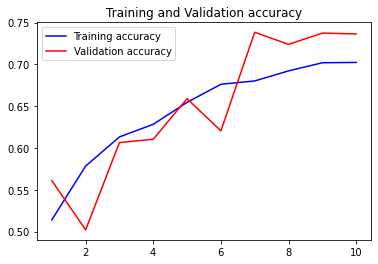

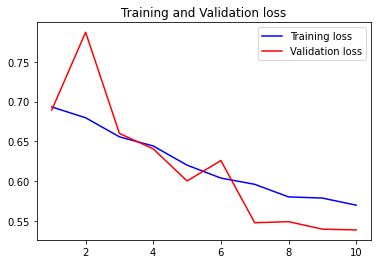

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(accuracy) + 1)

#Train and Validation accuracy
plt.plot(epoch, accuracy, 'b', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#Train and Validation loss
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch,val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()